In [305]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
import statistics
import datetime
import calendar

In [306]:
bike_day = pd.read_csv(r"C:\Users\Lucia\Desktop\Data Analytics\Bike Project\day.csv")
bike_hour = pd.read_csv(r"C:\Users\Lucia\Desktop\Data Analytics\Bike Project\hour.csv")

In [307]:
# Creating a DataFrame
day = pd.DataFrame(bike_day)
hour = pd.DataFrame(bike_hour)

In [308]:
day['dteday'] = pd.to_datetime(day['dteday'], format='%Y/%m/%d')
day_mini = day['day'] = day['dteday'].dt.day

Colour Palette

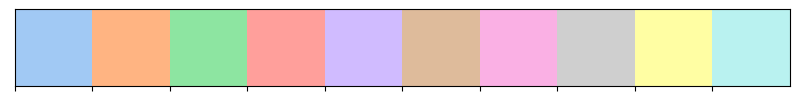

In [309]:

# Save a palette to a variable:
palette = sns.color_palette("pastel")

# Use palplot and pass in the variable:
sns.palplot(palette)

Normalization of Temperature

In [310]:
day.temp
t_min = -8
t_max = 39

day['t_temp'] = (t_max - t_min)* day.temp + t_min

In [311]:
hour.temp
t_min = -8
t_max = 39

hour['t_temp'] = (t_max - t_min)* hour.temp + t_min

Renaming the Columns

In [312]:
# Renaming the Columns

day.rename(columns={"instant": "ID", "dteday": "date", "yr": "year", "mnth": "month", "hum": "humidity", "atemp": "ftemp", "cnt": "count", "weathersit":"weather_condition"}, inplace=True)
hour.rename(columns={"instant": "ID", "dteday": "date", "yr": "year", "mnth": "month", "hum": "humidity", "atemp": "ftemp", "cnt": "count", "hr": "hour", "weathersit":"weather_condition"}, inplace=True)

Numerical attributes to category

In [313]:
#Type casting the datetime and numerical attributes to category

# day['season']=day.season.astype('category')
# day['year']=day.year.astype('category')
# day['month']=day.month.astype('category')
# day['holiday']=day.holiday.astype('category')
# day['weekday']=day.weekday.astype('category')
# day['workingday']=day.workingday.astype('category')
# day['weather_condition']=day.weather_condition.astype('category')

In [314]:
day.head()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,day,t_temp
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,8.175849
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2,9.083466
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3,1.229108
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4,1.400000
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5,2.666979


In [315]:
hour.head()

,ID,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,t_temp
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,3.28
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2.34
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2.34
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,3.28
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,3.28


In [316]:
# Isna: Detect missing values for an array-like object. 
# This function takes a scalar or array-like object and indicates whether values are missing
# Shape: Printing number of rows and columns 

day.shape
day.isna()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,day,t_temp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [317]:
# rounding the numb after the comma 
day = round(day, 2)
hour = round(day, 2)

In [318]:
#printing the first rows
day.head()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,day,t_temp
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,1,8.18
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2,9.08
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,3,1.23
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,4,1.40
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,5,2.67


In [319]:
day.tail()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,day,t_temp
726,727,2012-12-27,1,1,12,0,4,1,2,0.25,0.23,0.65,0.35,247,1867,2114,27,3.95
727,728,2012-12-28,1,1,12,0,5,1,2,0.25,0.26,0.59,0.16,644,2451,3095,28,3.91
728,729,2012-12-29,1,1,12,0,6,0,2,0.25,0.24,0.75,0.12,159,1182,1341,29,3.91
729,730,2012-12-30,1,1,12,0,0,0,1,0.26,0.23,0.48,0.35,364,1432,1796,30,4.02
730,731,2012-12-31,1,1,12,0,1,1,2,0.22,0.22,0.58,0.15,439,2290,2729,31,2.14


In [320]:
#Find the total number of missing values from the entire dataset
day.isnull().sum()
hour.isnull().sum()

ID                   0
date                 0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
ftemp                0
humidity             0
windspeed            0
casual               0
registered           0
count                0
day                  0
t_temp               0
dtype: int64

Info of Datatypes

In [321]:
day.info()
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    int64         
 3   year               731 non-null    int64         
 4   month              731 non-null    int64         
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weather_condition  731 non-null    int64         
 9   temp               731 non-null    float64       
 10  ftemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

Converting the Categories

In [322]:
# converting weekday
# day['weekday'] = day['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}).astype('category')
# hour['weekday'] = hour['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}).astype('category')

day.head()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,day,t_temp
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,1,8.18
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2,9.08
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,3,1.23
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,4,1.40
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,5,2.67


In [323]:
# convert integer to categorical

# converting season day
day['season'] = day.season.map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}).astype('category')
hour['season'] = day.season.map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}).astype('category')

# converting month
day['month'] = day.month.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Dec'}).astype('category')
hour['month'] = hour.month.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Dec'}).astype('category')

# converting weekday
day['weekday'] = day.weekday.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}).astype('category')
hour['weekday'] = hour.weekday.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}).astype('category')

# converting year
day['year'] = day.year.map({0: '2011', 1: '2012'}).astype('category')
hour['year'] = hour.year.map({0: '2011', 1: '2012'}).astype('category')


Text(0.5, 1.0, 'Seasons Count')

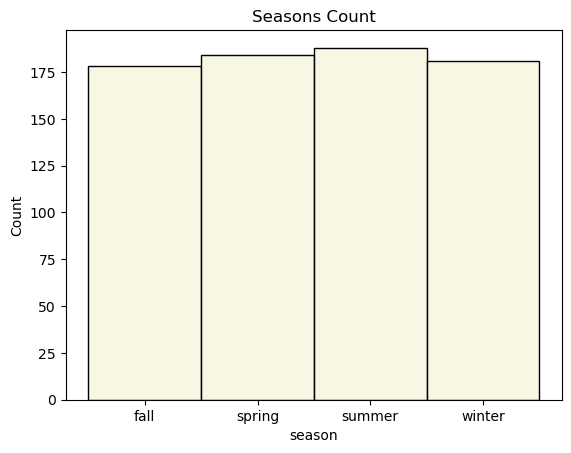

In [324]:
sns.histplot(data=day, x= "season", color= 'beige').set_title('Seasons Count')

Text(0.5, 1.0, 'Weekday Count')

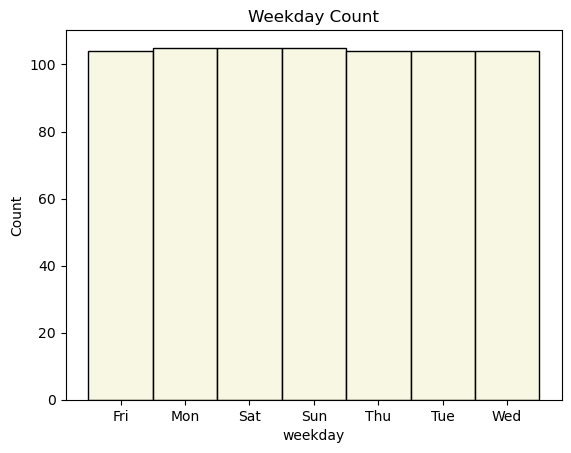

In [325]:
sns.histplot(data=day, x= "weekday", color= 'beige').set_title('Weekday Count')

Text(0.5, 1.0, 'Casual')

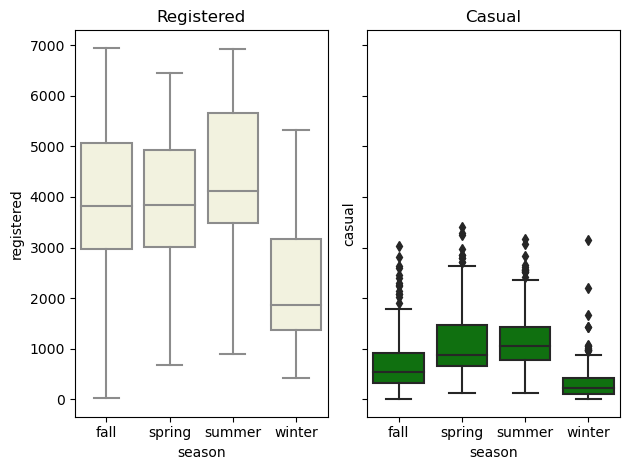

In [326]:
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True) 
sns.set_palette("pastel")

sns.boxplot(ax = axs[0], data=day, x="season", y="registered", color='beige').set_title('Registered')
sns.boxplot(ax = axs[1], data=day, x="season", y="casual", color='green').set_title('Casual')

In [327]:
day.head()

,ID,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,ftemp,humidity,windspeed,casual,registered,count,day,t_temp
0,1,2011-01-01,winter,2011,Jan,0,Sat,0,2,0.34,0.36,0.81,0.16,331,654,985,1,8.18
1,2,2011-01-02,winter,2011,Jan,0,Sun,0,2,0.36,0.35,0.70,0.25,131,670,801,2,9.08
2,3,2011-01-03,winter,2011,Jan,0,Mon,1,1,0.20,0.19,0.44,0.25,120,1229,1349,3,1.23
3,4,2011-01-04,winter,2011,Jan,0,Tue,1,1,0.20,0.21,0.59,0.16,108,1454,1562,4,1.40
4,5,2011-01-05,winter,2011,Jan,0,Wed,1,1,0.23,0.23,0.44,0.19,82,1518,1600,5,2.67


Text(0.5, 1.0, 'Casual Users Working Day')

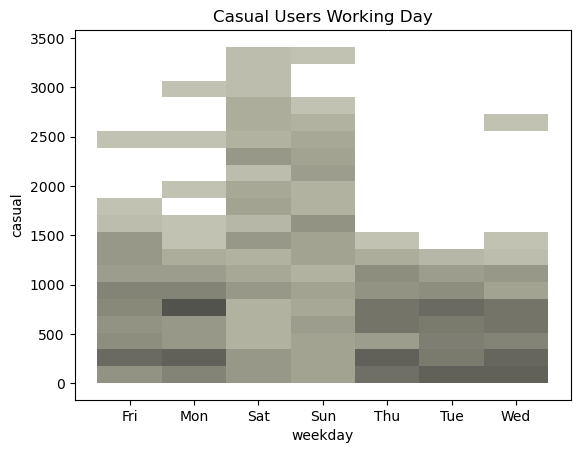

In [328]:
sns.histplot(data=day, x= "weekday", y="casual", color= 'beige').set_title('Casual Users Working Day')


Text(0.5, 1.0, 'Registered Users Working Day')

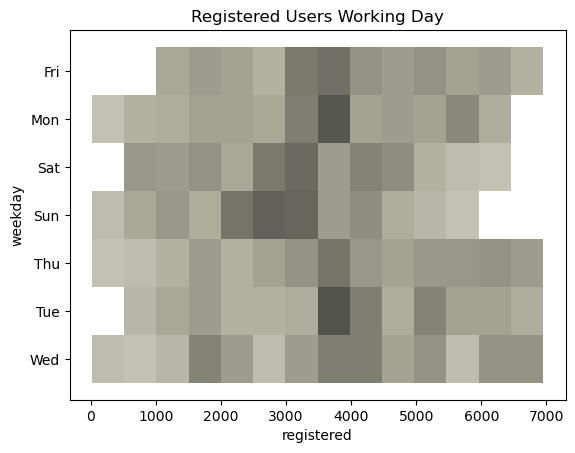

In [329]:
sns.histplot(data=day, x= "registered", y="weekday", color= 'beige').set_title('Registered Users Working Day')

Text(0.5, 1.0, 'Working Day & Casual Users')

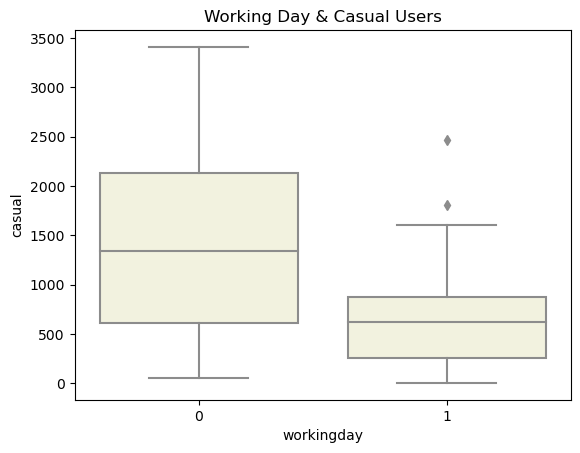

In [330]:
sns.boxplot(data=day, x= "workingday", y= "casual", color='beige').set_title('Working Day & Casual Users')


Text(0.5, 1.0, 'Season Hour')

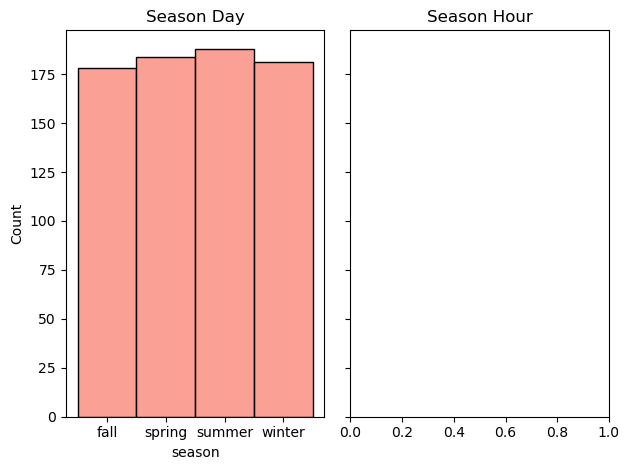

In [331]:
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True) 

sns.histplot(ax = axs[0], data=day, x="season", color='salmon', bins=10).set_title('Season Day')
sns.histplot(ax = axs[1], data=hour, x="season", color='beige', bins=10).set_title('Season Hour')

<AxesSubplot:xlabel='workingday', ylabel='registered'>

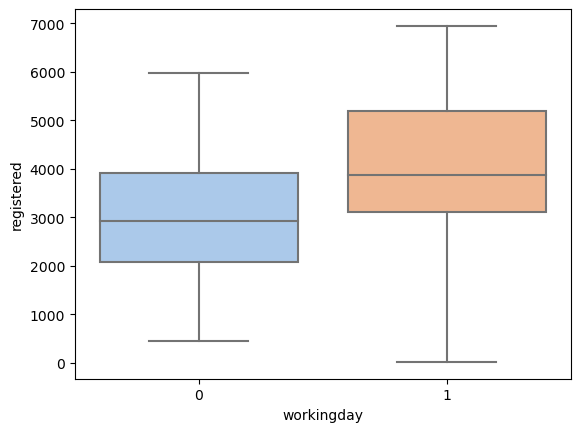

In [332]:
sns.boxplot(data=day, x= 'workingday', y= 'registered')